In [3]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scanpy as sc
from bbknn import bbknn
import scanorama as scnrma
import pandas as pd

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=100)

scanpy==1.6.0 anndata==0.7.4 umap==0.3.10 numpy==1.17.2 scipy==1.5.2 pandas==1.1.0 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.7.0


# P38 gluta


In [55]:
P38_glut = adata_gluta[adata_gluta.obs.batch=='P38', :]
del P38_glut.obsp
del P38_glut.varm
del P38_glut.obsm
del P38_glut.uns
P38_glut.X = P38_glut.raw.X
sc.pp.highly_variable_genes(P38_glut, min_mean=0.0125, max_mean=3, min_disp=0.5) #HVGs

P38_glut_CBs = list(P38_glut.obs.index)
P38_glut_batch = []
for i in range(len(P38_glut_CBs)):
    P38_glut_batch.append(P38_glut_CBs[i][19:25])
    
P38_glut.obs['sample'] = P38_glut.obs['batch']
P38_glut.obs['sample'] = P38_glut_batch


'''
sc.pp.scale(P38_glut, max_value=10) #scale
sc.tl.pca(P38_glut, svd_solver='arpack') #run PCA

P38_glut_CBs = list(P38_glut.obs.index)
P38_glut_batch = []
for i in range(len(P38_glut_CBs)):
    P38_glut_batch.append(P38_glut_CBs[i][19:25])
    
P38_glut.obs['sample'] = P38_glut.obs['batch']
P38_glut.obs['sample'] = P38_glut_batch

sc.pp.neighbors(P38_glut, n_neighbors=25, n_pcs=40) #choose 25 standard for now
#bbknn(P38_glut, batch_key='sample',neighbors_within_batch=8) #8*3~=25
sc.tl.leiden(P38_glut)
sc.tl.umap(P38_glut)
'''

var_genes = list(P38_glut[:,P38_glut.var['highly_variable']].var_names)

batches = ['P38_1a','P38_2a', 'P38_2b']
alldata = {}
for batch in batches:
    alldata[batch] = P38_glut[P38_glut.obs['sample'] == batch,]

alldata2 = dict()
for ds in alldata.keys():
    print(ds)
    alldata2[ds] = alldata[ds][:,var_genes]

#convert to list of AnnData objects
P38_gluts = list(alldata2.values())

# run scanorama.integrate
scanorama  = scanorama.integrate_scanpy(P38_gluts, dimred = 50,)

# returns a list of 2 np.ndarrays with 50 columns.

print(scanorama[0].shape)
print(scanorama[1].shape)

# make inteo one matrix.
all_s = np.concatenate(scanorama)
print(all_s.shape)

# add to the AnnData object
P38_glut.obsm["SC"] = all_s

sc.pp.neighbors(P38_glut, n_neighbors=25, n_pcs=40, use_rep='SC')
sc.tl.leiden(P38_glut)
sc.tl.umap(P38_glut)

P38_1a
P38_2a
P38_2b
Found 3399 genes among all datasets
[[0.         0.8403444  0.51028378]
 [0.         0.         0.97552721]
 [0.         0.         0.        ]]
Processing datasets (1, 2)
Processing datasets (0, 1)
Processing datasets (0, 2)
(2810, 50)
(4065, 50)
(10716, 50)


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../opt/anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../opt/anaconda3

In [60]:
#P38_glut = P38_glut[P38_glut.obs['leiden']!='16',:]

In [3]:
P38_glut = sc.read_h5ad('P38_glut08122020.h5ad')

Storing dendrogram info using `.uns["dendrogram_['leiden']"]`


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


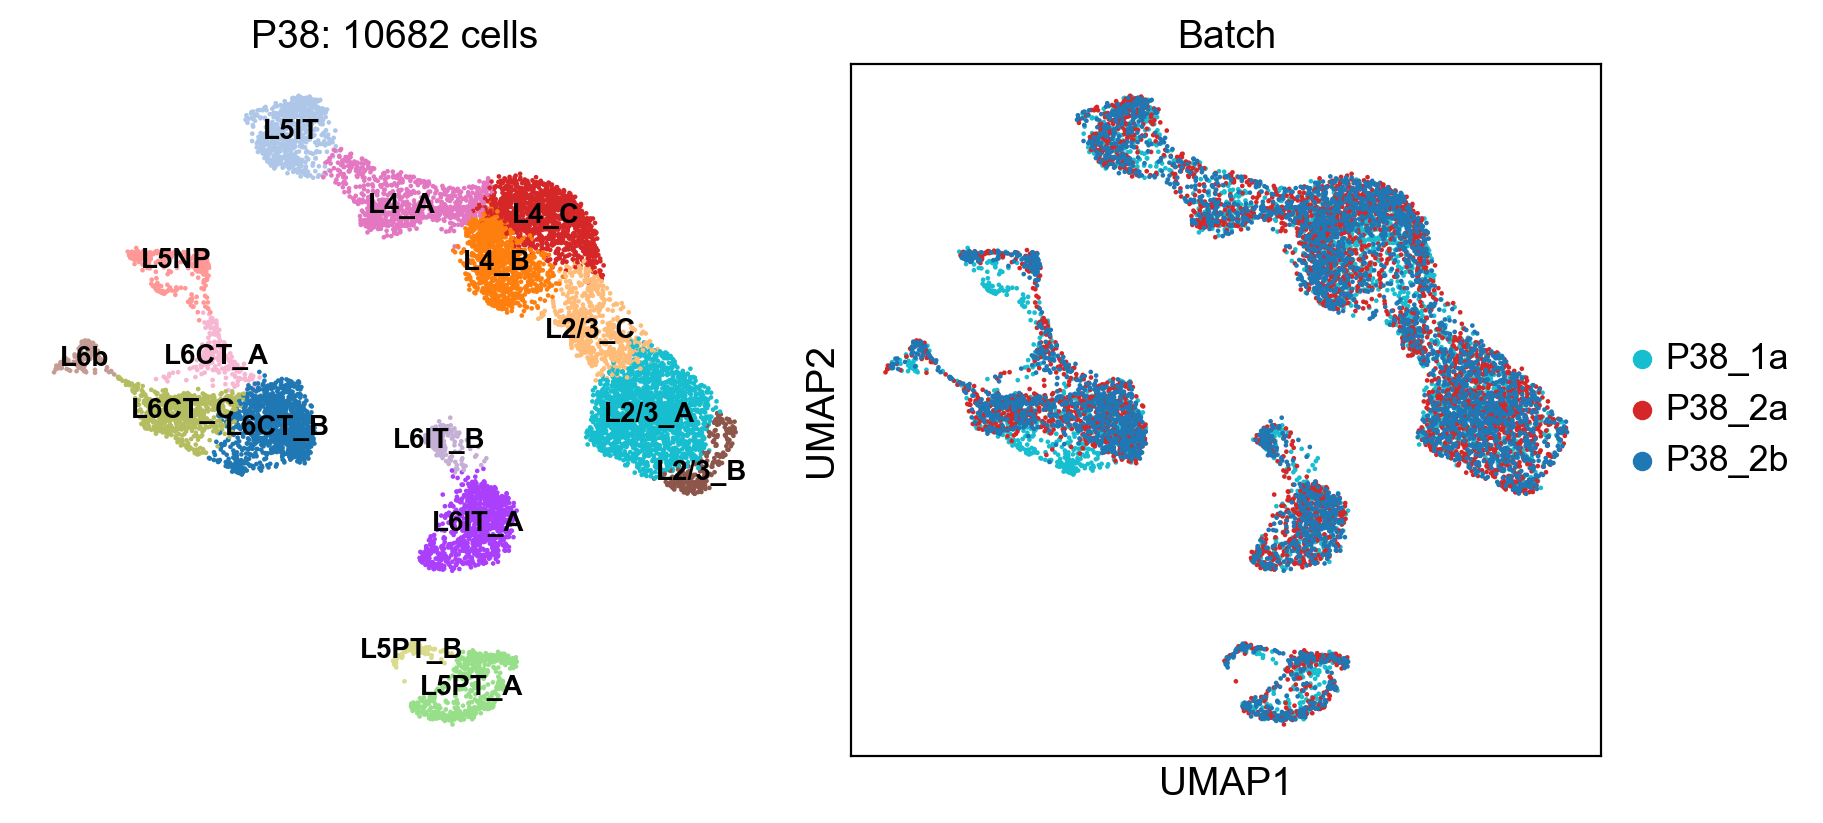

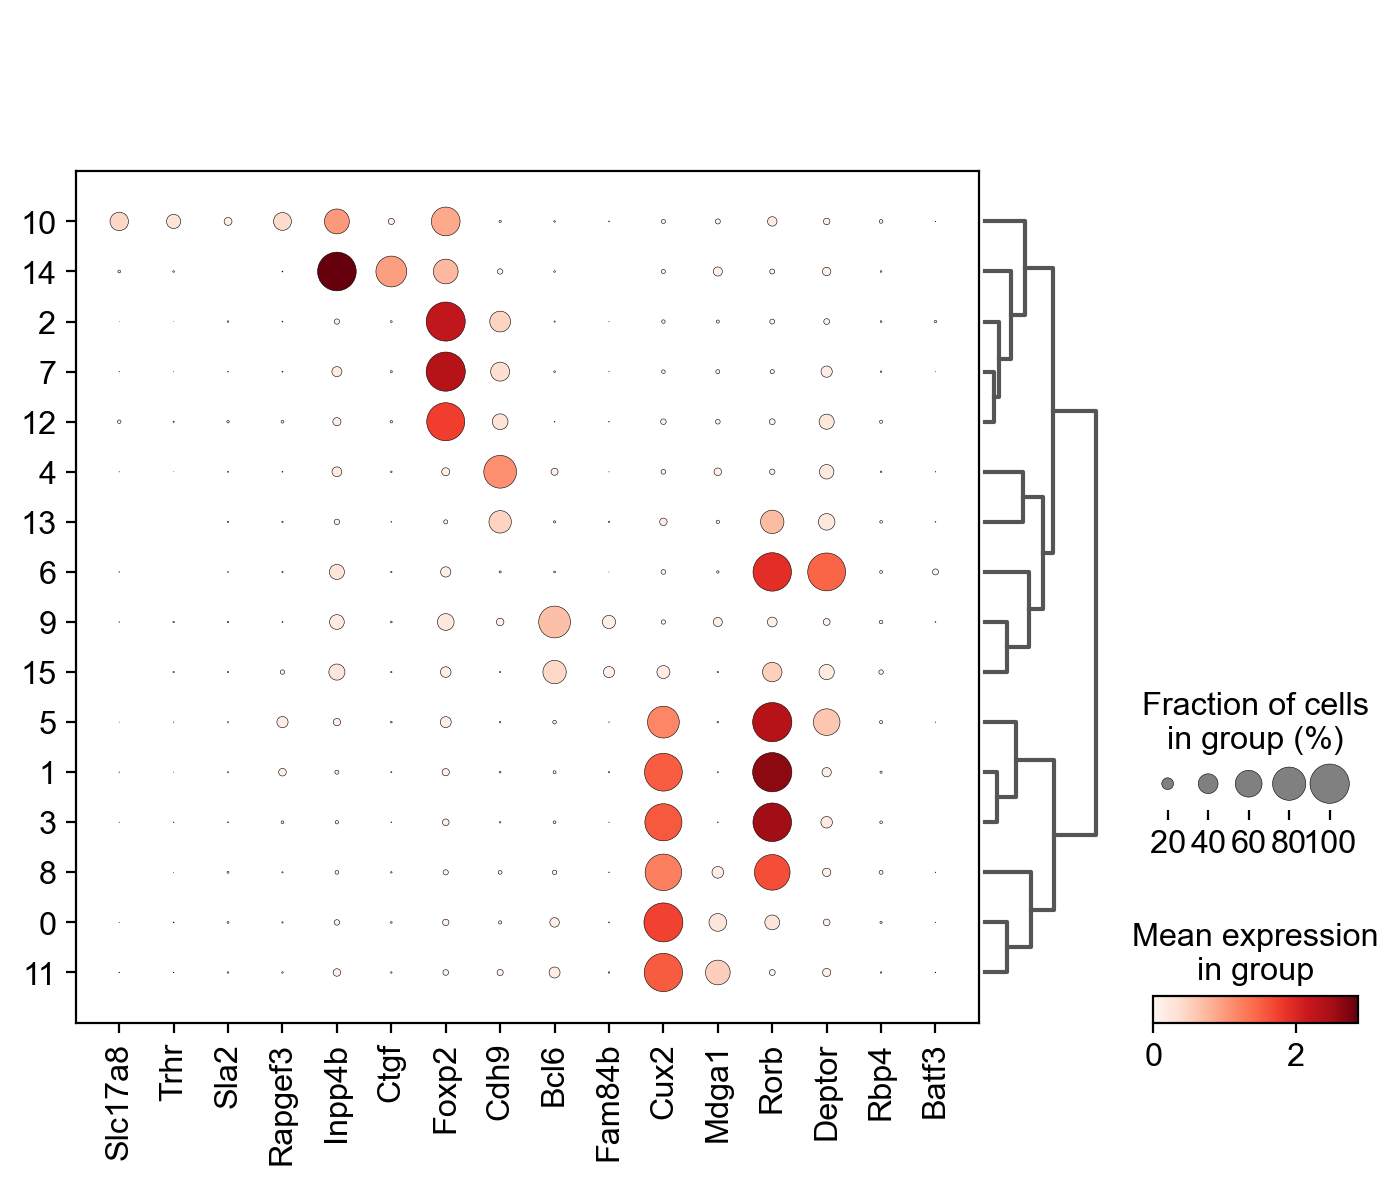

In [7]:
sc.tl.dendrogram(P38_glut, groupby='leiden', use_rep='SC')
fig, axs = plt.subplots(1, 2, figsize = (9,4), constrained_layout=True)
sc.pl.umap(P38_glut, color='cluster',ax=axs[0], legend_fontsize='10', 
           show=False, title='P38: ' + str(P38_glut.shape[0]) + ' cells', 
          frameon=False, 
          palette=('#17becf', '#d62728','#1f77b4', '#ff7f0e', '#aa40fc', '#e377c2', 
                  '#aec7e8', '#b5bd61', '#ffbb78', '#98df8a', '#ff9896', '#8c564b', 
                  '#f7b6d2', '#c5b0d5', '#c49c94', '#dbdb8d'), legend_loc='on data')
sc.pl.umap(P38_glut, color='sample', ax=axs[1], show=False, title='Batch')

bias_markers = ['Slc17a8', 'Trhr', 'Sla2', 'Rapgef3', 'Inpp4b',  'Ctgf','Foxp2',
                 'Cdh9', 'Bcl6', 
                'Fam84b', 'Cux2', 'Mdga1', 'Rorb',
                'Deptor', 'Rbp4', 'Batf3'
               ]

#bias_pos = [(0,6), (7,15)]
#bias_labels = ['Neuronal', 'Non-Neuronal']
sc.pl.dotplot(P38_glut, bias_markers, groupby='leiden', dendrogram=True)

Bottom to top of dendrogram

* 11 to 8: L2/3
* 3 to 5: L4
* 15, 9: L5 PT
* 6: L5 IT
* 13, 4: L6 IT
* 12 to 2: L6 CT
* 14: L6b
* 10: L5 NP

In [406]:
cluster_dict = {0:'L2/3_A', 1:'L4_C', 2:'L6CT_B', 3:'L4_B', 4:'L6IT_A', 5:'L4_A', 6:'L5IT', 
                7:'L6CT_C', 8:'L2/3_C', 9:'L5PT_A', 
                10:'L5NP', 11:'L2/3_B', 12:'L6CT_A', 13:'L6IT_B', 14:'L6b', 15:'L5PT_B'}
cluster = []
for i in cluster_dict: cluster.append((cluster_dict[i]))

P38_glut.obs['cluster'] = P38_glut.obs['leiden']
P38_glut.rename_categories(key='cluster', categories=cluster)

Storing dendrogram info using `.uns["dendrogram_['cluster']"]`


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


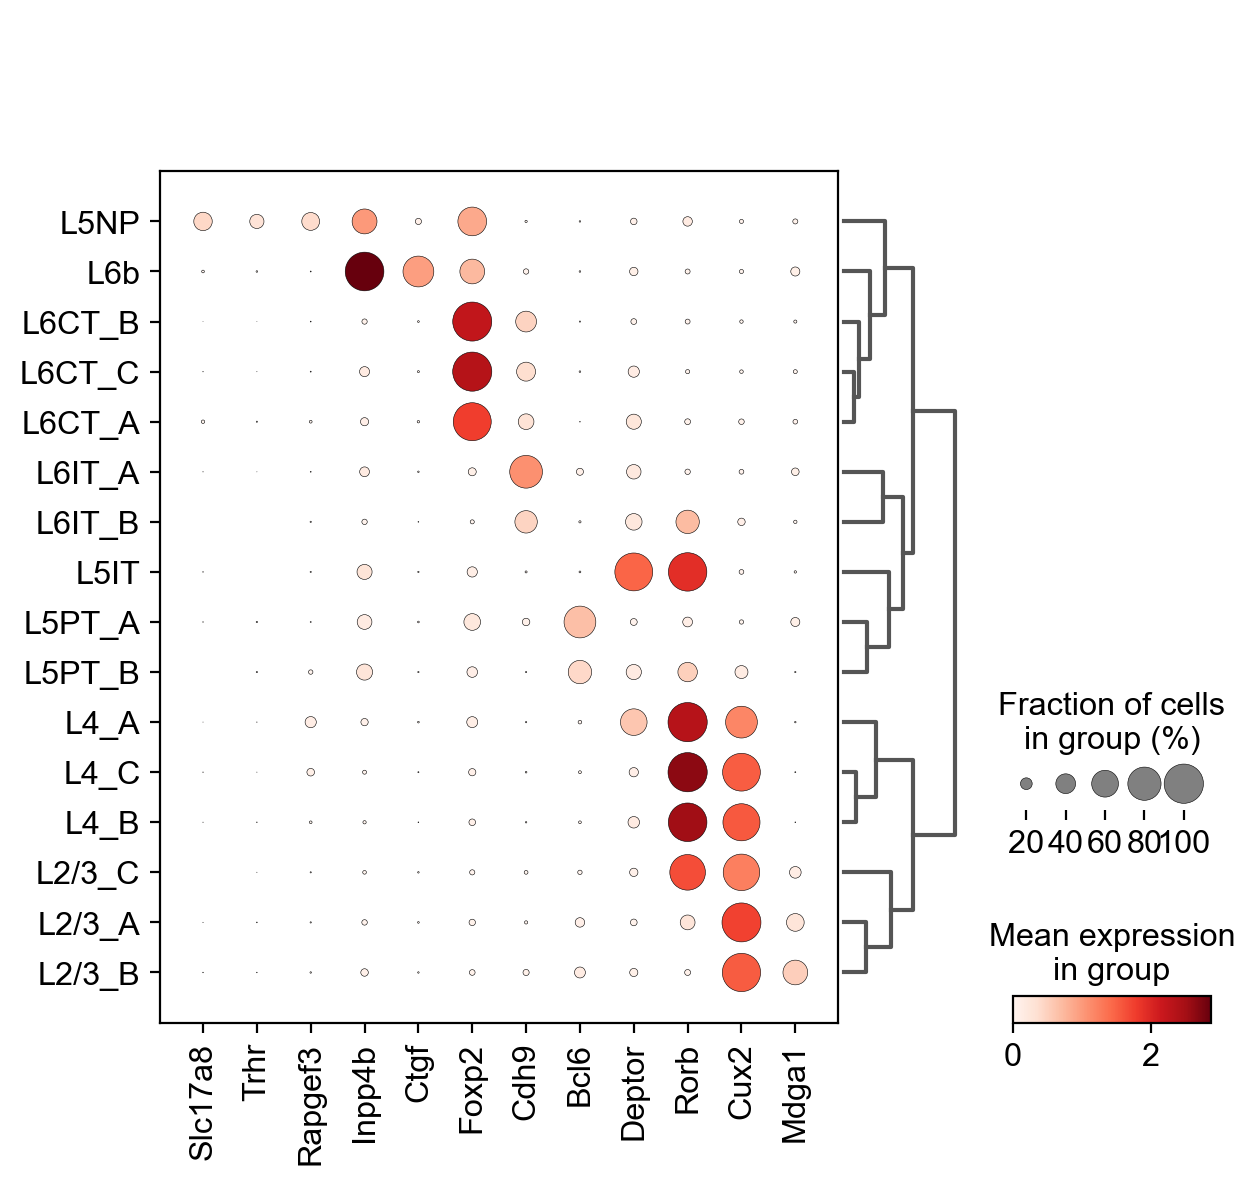

In [8]:
sc.tl.dendrogram(P38_glut, groupby='cluster', use_rep='SC')
bias_markers = ['Slc17a8', 'Trhr', 'Rapgef3', 'Inpp4b',  'Ctgf','Foxp2',
                 'Cdh9', 'Bcl6' 
                , 'Deptor',  'Rorb', 'Cux2', 'Mdga1'
                ]

#bias_pos = [(0,6), (7,15)]
#bias_labels = ['Neuronal', 'Non-Neuronal']
sc.pl.dotplot(P38_glut, bias_markers, groupby='cluster', dendrogram=True)

In [8]:
P38_glut = sc.read_h5ad('P38_glut.h5ad')

# Read

In [4]:
P38_glut = sc.read_h5ad('P38_glut08122020.h5ad')